# Quinta entrega 

## Pasos a seguir
Realice un análisis descriptivo completo y actualizado al julio 31 2024, incluyendo graficos, tablas y georreferenciación de la base de datos Accidentalidad_en_Barranquilla.csv. Deben entregar un script .R con los códigos usados.

1.  Contextualizar tanto la base de datos como las variables describiendo en qué consiste cada una de ellas. La base de datos está en el sitio web: https://www.datos.gov.co/Transporte/Accidentalidad-en-Barranquilla/yb9r-2dsi

2.  Analizar las características de la base de datos. Estas pueden incluir: número de filas, número de columnas, nombres de las variables, tipos de variables, entre otros.

3.  Analizar cada una de las variables según su tipo: numéricas y categóricas.

4.  Filtrar la base de datos para entender mejor su estructura. Aplique filtros en al menos cinco oportunidades.

5.  Utilice la función table para explorar la base de datos.

6.  Identifique los valores NA (Not Available) en la base de datos.

7.  Analice la presencia de posibles valores atípicos.

8.  Aplique imputación de datos usando las siguientes opciones para method: method="pmm" method="norm.predict" method="norm.nob" method="norm"

9.  Identifique datos atípicos para cada variable en el dataset usando las técnicas estudiadas en clase. Además, realice imputación de los datos atípicos con base en lo desarrollado en el ítem anterior. Imputación/Capping/Predicción Test de Rosner, Dixon, Grubbs, Hampel, Percentiles, Boxplots, Histogramas, Descriptivos.

Realice una exploración y un análisis descriptivo completo (incluyendo tablas de resumen y gráficos) de la base de datos disponible en [este enlace](https://www.sicom.gov.co/index.php/consulta-de-precios). Incluya gráficos que presenten los datos sobre un mapa de Colombia, para visualizar la distribución geográfica de los **precios de los combustibles en el país (2018-2024).**

### Librerías

In [236]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from numpy import mean
import geopandas as gpd
import pandas as pd
from shapely import wkt
import folium
from folium import Choropleth, Marker
from IPython.display import FileLink, display
from folium.plugins import HeatMap

warnings.filterwarnings('ignore')

## Desarrollo primera parte
### Sobre los datos

In [149]:
be5 = pd.read_csv("Accidentalidad_en_Barranquilla_20240830.csv")
be5.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
0,2018-01-01T00:00:00.000,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,NaN,1,2018,January,Mon
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1,2018,January,Mon


La base de datos proporcionada contiene 25,600 registros con información detallada sobre los accidentes de tránsito ocurridos en Barranquilla, según los informes policiales de accidentes de tránsito (IPAT). Para cada incidente, se reportan datos como la fecha, hora, gravedad, clase del accidente, sitio exacto, y cantidades de heridos y muertos en el lugar del accidente. La información es proporcionada por la Alcaldía Distrital de Barranquilla.

La base de datos cuenta con 11 variables tanto numéricas como categóricas. Las variables que contienen datos de texto incluyen la fecha completa del incidente, la hora exacta en la que ocurrió, la gravedad del accidente, tipo del incidente, y el lugar exacto donde sucedió. Por otro lado, las variables numéricas abarcan el número de heridos y fallecidos en el sitio del accidente, así como el total de accidentes registrados en ese momento. Además, componentes temporales como el año, mes y día de la semana también se almacenan como texto.

Enfocándonos un poco en las variables numéricas, veamos ahora la distribución de el **número de heridos en sitio del accidente**. En promedio se registraron, 1.47 heridos por accidente, también se destaca la presencia de 15626 datos faltantes.

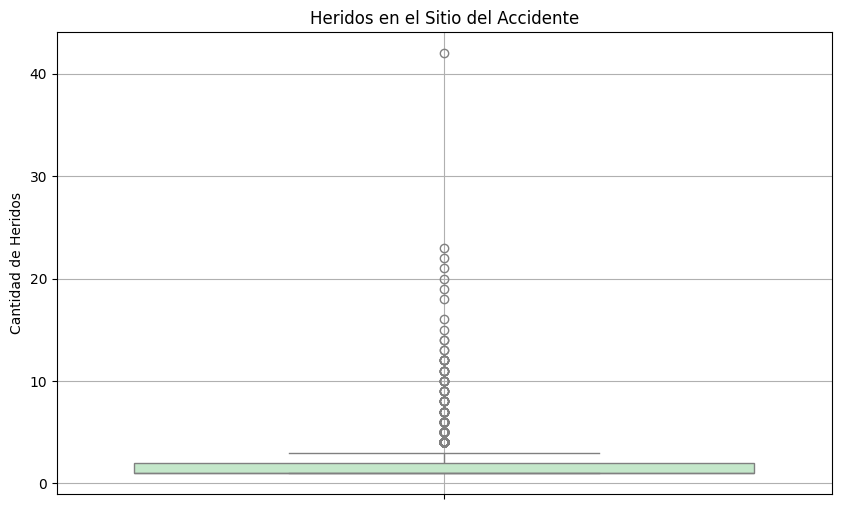

In [150]:
be5['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].describe()

plt.figure(figsize=(10, 6))
sns.boxplot(y=be5['CANT_HERIDOS_EN _SITIO_ACCIDENTE'], color = '#beedc6')
plt.title("Heridos en el Sitio del Accidente")
plt.ylabel("Cantidad de Heridos")
plt.xlabel("")
plt.grid(True)
plt.show()


Al graficar esta variable, observamos la presencia de muchos datos atípicos, con valores extremos hacia arriba. El registro con más heridos presentados fue con 42 heridos. Ahora, para la variable **cantidad de muertos en accidente**.

In [151]:
be5['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].describe()

count    252.000000
mean       1.035714
std        0.185946
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: CANT_MUERTOS_EN _SITIO_ACCIDENTE, dtype: float64

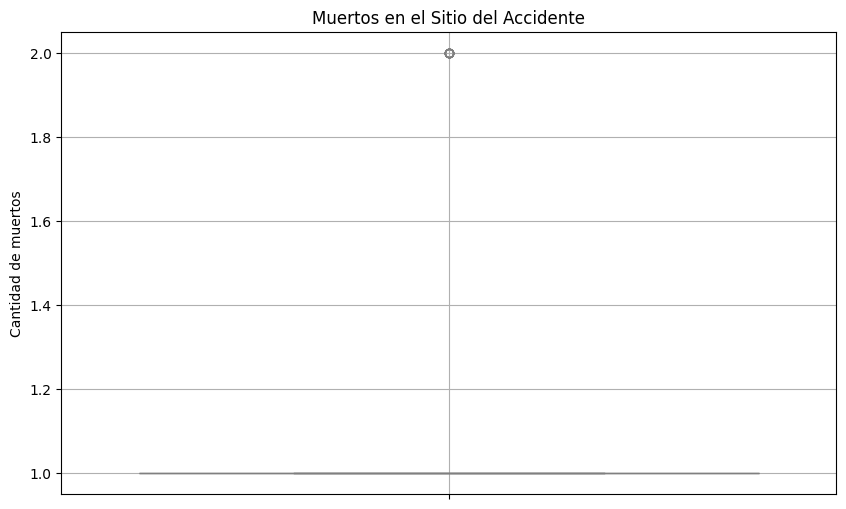

In [152]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=be5['CANT_MUERTOS_EN _SITIO_ACCIDENTE'], color='#beedc6')
plt.title("Muertos en el Sitio del Accidente")
plt.ylabel("Cantidad de muertos")
plt.xlabel("")
plt.grid(True)
plt.show()

Para aquellos registros donde se presentaron decesos, se tiene un promedio de una persona fallecida por accidente, sin embargo, existen outliers donde la cantidad de muertos asciende a dos personas. De igual manera que con la variable anterior, se destaca la presencia de 25358 datos faltantes.Y por último, para la variable relacionada al **total de accidentes reportados en ese momento**

In [153]:
be5['CANTIDAD_ACCIDENTES'].describe()

count    25610.000000
mean         1.000195
std          0.013972
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: CANTIDAD_ACCIDENTES, dtype: float64

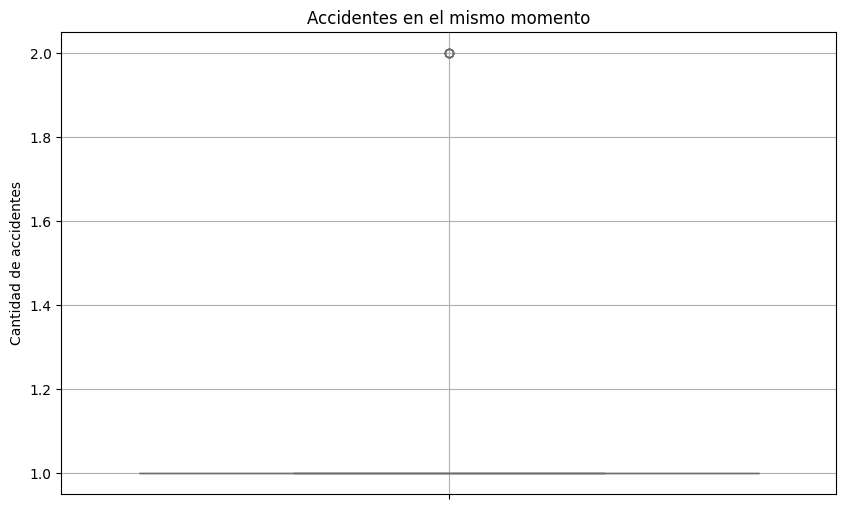

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=be5['CANTIDAD_ACCIDENTES'], color='#a7c8c9')
plt.title("Accidentes en el mismo momento")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("")
plt.grid(True)
plt.show()

De manera similar a la variable anterior, se tiene una media de 1 (sd: 0.013971) y mediana de 1 (RIQ: 0). También se destaca la presencia de outliers que indican 2 accidentes simultaneos, en el mismo sitio y a la misma hora. A diferencia de las otras dos variables numéricas, no se encuentran datos faltantes en esta variable.

Para las variables categóricas, comenzando con la **fecha del accidente**:

In [155]:
be5['FECHA_ACCIDENTE'].value_counts()

FECHA_ACCIDENTE
2018-06-08T00:00:00.000    34
2018-11-16T00:00:00.000    33
2019-05-22T00:00:00.000    31
2019-10-05T00:00:00.000    30
2020-02-13T00:00:00.000    29
                           ..
2023-07-18T00:00:00.000     1
2023-08-01T00:00:00.000     1
2020-03-25T00:00:00.000     1
2023-06-26T00:00:00.000     1
2020-04-12T00:00:00.000     1
Name: count, Length: 2357, dtype: int64

Se tiene información de 2357 días, siendo el 8 de junio del 2018 el día con más accidentes (34 accidentes), seguido del 16 de noviembre del 2018 con 33 y el 22 de mayo del 2019 con 31. Realizando el mismo análisis con la **hora de accidente**.

In [156]:
be5['HORA_ACCIDENTE'].value_counts()

HORA_ACCIDENTE
04:00:00:pm    408
03:00:00:pm    408
12:30:00:pm    387
08:00:00:am    384
05:00:00:pm    384
              ... 
11:23:00:pm      1
10:57:00:am      1
02:44:00:am      1
03:28:00:pm      1
08:08:00:pm      1
Name: count, Length: 871, dtype: int64

Se nota que las horas con más accidentes registrados son las 3pm (408), 4pm (408) y 12:30pm (387).

In [157]:
be5['GRAVEDAD_ACCIDENTE'].value_counts()

GRAVEDAD_ACCIDENTE
Solo daños     15457
Con heridos     9901
Con muertos      252
Name: count, dtype: int64

Afortunadamente, la mayoría de los accidentes fueron solo daños materiales, seguido de heridos y en menor medida con muertos (0.98%).


In [158]:
be5['CLASE_ACCIDENTE'].value_counts()

CLASE_ACCIDENTE
Choque            23819
Atropello          1344
Caida Ocupante      194
Otro                123
Volcamiento         117
Incendio             13
Name: count, dtype: int64

De los 25610 accidentes reportados, 23819 (93%) son debido a choques, 1344 (5,24%) por atropellos, el 1,76% restante está compuesto entre incendios, volcamientos, caída del ocupante, entre otros. Para la variable **año**, encontramos que 2018 es el año con más accidentes registrados y 2023 el que menos accidentes presentó, excluyendo 2024 dado que no se ha finalizado el año.

In [159]:
be5['AÑO_ACCIDENTE'].value_counts()

AÑO_ACCIDENTE
2018    5898
2019    5645
2021    4700
2022    3683
2020    3281
2023    1662
2024     741
Name: count, dtype: int64

En cuanto a la variable relacionada al **mes del accidente**, se puede observar que febrero es el mes con más accidentes reportados en la ciudad de Barranquilla, seguido de marzo y enero. Agosto, con 1918 registros, es el mes con menos accidentes.

In [160]:
be5['MES_ACCIDENTE'].value_counts()

MES_ACCIDENTE
February     2477
March        2446
January      2349
December     2189
May          2121
June         2103
October      2090
April        2010
November     1995
September    1980
July         1932
August       1918
Name: count, dtype: int64

Y por último, el día con más accidentes reportados es el día de martes, seguido por viernes y miércoles. En cambio, los domingos, son los días con menos accidentes reportados.

In [161]:
be5['DIA_ACCIDENTE'].value_counts()

DIA_ACCIDENTE
Tue    4009
Fri    3920
Wed    3839
Mon    3774
Thu    3756
Sat    3735
Sun    2577
Name: count, dtype: int64

### Filtros

Veamos ahora aquellos accidentes realizados los fines de semana por choques según el mes.

In [162]:
datos_filtrados = be5[(be5['DIA_ACCIDENTE'].isin(['Sat', 'Sun'])) & (be5['CLASE_ACCIDENTE'] == 'Choque')]

datos_filtrados['MES_ACCIDENTE'].value_counts()


MES_ACCIDENTE
March        578
February     557
January      511
June         498
October      495
December     492
May          478
September    465
August       446
April        443
July         436
November     423
Name: count, dtype: int64

Siendo Marzo (578) el mes con más accidentes por choques en los fines de semana, seguido por febrero (557) y enero (511).Noviembre fue el mes que presentó menos accidentes los fines de semana (423).


In [163]:
datos_filtrados = be5[
    (~be5['DIA_ACCIDENTE'].isin(['Sat', 'Sun'])) & 
    (be5['CLASE_ACCIDENTE'] == 'Choque')
]

datos_filtrados['MES_ACCIDENTE'].value_counts()

MES_ACCIDENTE
February     1753
March        1690
January      1670
December     1536
May          1490
June         1454
October      1435
April        1428
November     1426
July         1395
September    1366
August       1354
Name: count, dtype: int64

Para el resto de días de la semana, febrero es el mes con más choques (1753), seguido de marzo (1690) y enero (1670). Agosto fue el mes con menos accidentes entre semana (1354).

In [164]:
datos_filtrados = be5[
    be5['MES_ACCIDENTE'].isin(['January', 'February', 'March', 'April', 'May', 'June']) & 
    (be5['GRAVEDAD_ACCIDENTE'] == 'Con heridos')
]

datos_filtrados['AÑO_ACCIDENTE'].value_counts()


AÑO_ACCIDENTE
2018    865
2022    861
2023    833
2019    795
2024    722
2021    659
2020    533
Name: count, dtype: int64

In [165]:
datos_filtrados = be5[
    (~be5['MES_ACCIDENTE'].isin(['January', 'February', 'March', 'April', 'May', 'June'])) & 
    (be5['GRAVEDAD_ACCIDENTE'] == 'Con heridos')
]

datos_filtrados['AÑO_ACCIDENTE'].value_counts()

AÑO_ACCIDENTE
2022    892
2018    866
2019    795
2021    782
2023    774
2020    524
Name: count, dtype: int64

Durante la primera mitad del año, 2020 fue el año con menos accidentes con heridos, mientras 2018 fue el año con más accidentes graves. Para el segundo semestre del año, el año con más accidentes graves fue 2022, nuevamente 2020 siendo el año con menos de este tipo de accidentes.


In [166]:
datos_filtrados = be5[
    (be5['DIA_ACCIDENTE'].isin(['Sat', 'Sun'])) & 
    (be5['GRAVEDAD_ACCIDENTE'] == 'Con heridos')
]

datos_filtrados['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].value_counts()


CANT_HERIDOS_EN _SITIO_ACCIDENTE
1.0     1798
2.0      694
3.0      154
4.0       49
5.0       23
6.0        9
7.0        1
9.0        1
11.0       1
Name: count, dtype: int64

In [167]:
datos_filtrados = be5[
    (~be5['DIA_ACCIDENTE'].isin(['Sat', 'Sun'])) & 
    (be5['GRAVEDAD_ACCIDENTE'] == 'Con heridos')
]

datos_filtrados['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].value_counts()


CANT_HERIDOS_EN _SITIO_ACCIDENTE
1.0     5061
2.0     1588
3.0      309
4.0      103
5.0       34
6.0       20
7.0       13
8.0        8
10.0       7
11.0       5
12.0       5
9.0        5
13.0       2
14.0       2
22.0       1
20.0       1
16.0       1
42.0       1
19.0       1
21.0       1
23.0       1
18.0       1
15.0       1
Name: count, dtype: int64

Se puede observar como el rango de heridos en el sitio del accidente aumentó en los días de semana, manteniéndose entre 1 y 11 los sábados y domingo y entre 1 y 42 los días de semana. Aún así, son muchísimo más común que solo hayan entre 1 y 3 heridos.

### NAs

In [168]:
be5.describe(include='all')

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
count,25610,25610,25610,25610,25610,9984.000000,252.000000,25610.000000,25610.000000,25610,25610
unique,2357,871,3,6,15365,NaN,NaN,NaN,NaN,12,7
top,2018-06-08T00:00:00.000,04:00:00:pm,Solo daños,Choque,CL 110 CR 9G,NaN,NaN,NaN,NaN,February,Tue
freq,34,408,15457,23819,77,NaN,NaN,NaN,NaN,2477,4009
mean,NaN,NaN,NaN,NaN,NaN,1.471655,1.035714,1.000195,2020.100547,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.156751,0.185946,0.013972,1.713887,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2018.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2019.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2020.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,2021.000000,NaN,NaN



Se observa la presencia de NA's solo en las columnas que brindan información sobre la cantidad de heridos y muertos en accidente, veamos ahora si el número de valores faltantes coincide con aquellos registros donde la gravedad del accidente sugiere la ausencia de personas heridas y muertas.

Tomando los accidentes con heridos, se puede observar que el número de NA's en el número de muertos coincide con el número de registros de este dataframe filtrado, es decir, no hay problema con la presencia de estos datos dado que representan el que no hayan habido muertos en estos accidentes

En los 7 años de registros del dataframe se presentaron 252 accidentes con al menos un deceso, donde 169 no presentaron heridos. Es decir, en los 83 accidentes restantes se presentó por lo menos una persona herida.



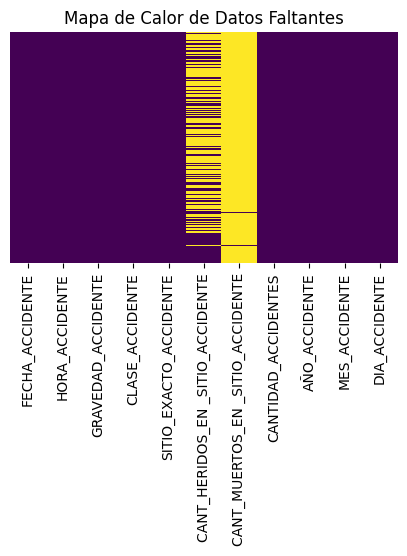

In [169]:
plt.figure(figsize=(5, 3))
sns.heatmap(be5.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

In [170]:
be5['GRAVEDAD_ACCIDENTE'].value_counts(normalize=True) * 100

GRAVEDAD_ACCIDENTE
Solo daños     60.355330
Con heridos    38.660679
Con muertos     0.983991
Name: proportion, dtype: float64

Esto arroja un 60,36% registros con la ausencia de datos en en el número de heridos y número de muertos al tiempo, este porcentaje coincide con el 60,36% de accidentes relacionados a solo daño. De igual manera, corresponde también el 38,66% faltante de numero de muertos al 38,66% de aquellos accidentes con heridos. El porcentaje correspondiente al 0.9% de accidentes con muertes se reparte entre una ausencia de heridos de 0.66% y registros completos de 0.32%.

Esto quiere decir que los datos faltantes no requieren una imputación dado que no están relacionados a un error o datos no tomados, si no que hacen referencia a un valor que representa la ausencia de heridos o muertos como lo podría ser un 0.

Debido al gran procentaje de datos faltantes también se podría proceder a eliminar las columnas involucradas, sin embargo para proceder con el análisis exploratorio se trabajará con la base de datos con los NAs. 

### Gráficas

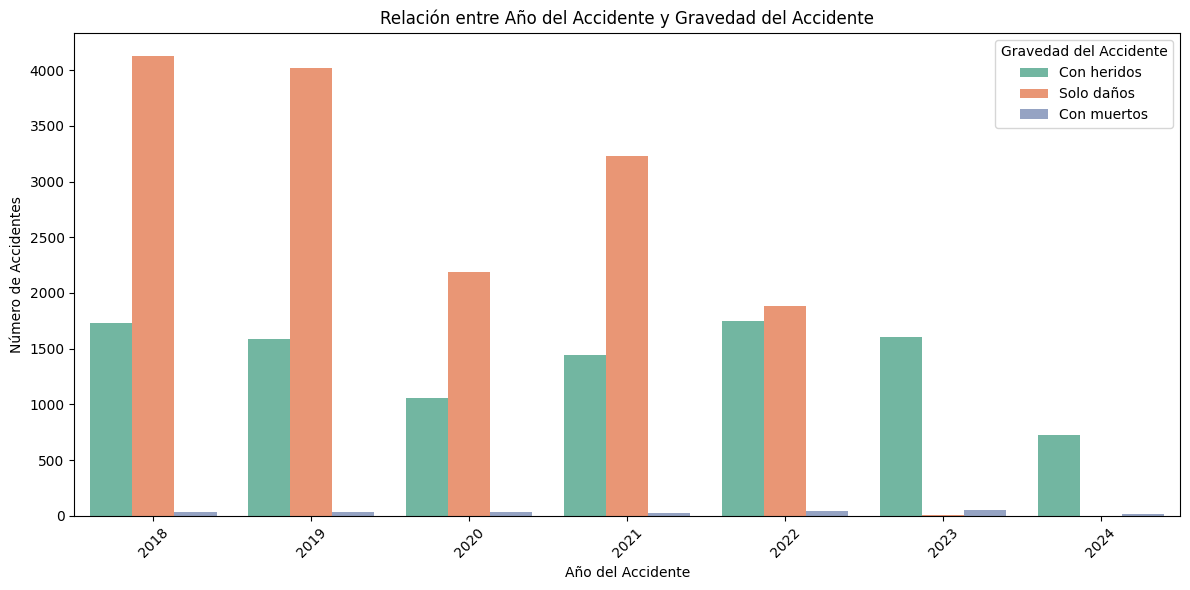

In [171]:
plt.figure(figsize=(12, 6))
sns.countplot(data=be5, x='AÑO_ACCIDENTE', hue='GRAVEDAD_ACCIDENTE', dodge=True, palette='Set2')

plt.title('Relación entre Año del Accidente y Gravedad del Accidente')
plt.xlabel('Año del Accidente')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad del Accidente')

plt.tight_layout()
plt.show()

Se puede observar como 2018 fue un año con una recurrencia de accidentes bastante alta, por suerte, predominan aquellos accidentes donde solo hubo daños materiales en la mayoría de los años. En lo transcurrido del 2024, pasa algo muy curioso, y es que la categoría dominante de accidentes fueron aquellos con heridos, seguido de con muertos. Además, se notó una disminución bastante notable de accidentes en el 2020 en comparación al 2019 y en el 2021 en comparación al 2023. Los accidentes con muertes tienen recurrencias similares en todos los años.

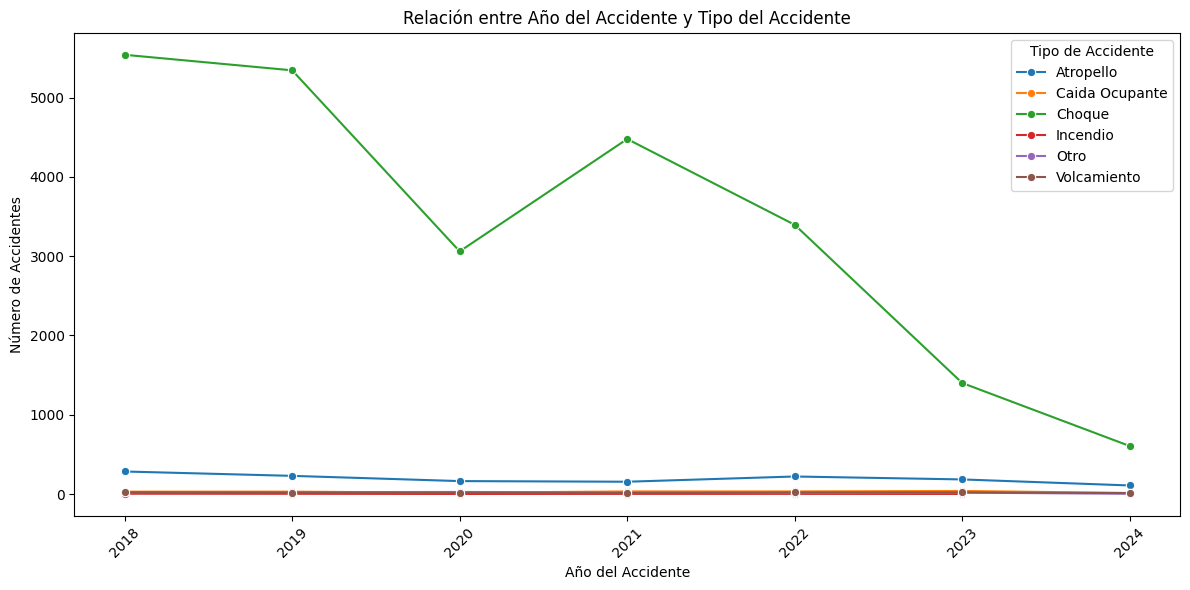

In [172]:
df_grouped = be5.groupby(['AÑO_ACCIDENTE', 'CLASE_ACCIDENTE']).size().reset_index(name='n')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='AÑO_ACCIDENTE', y='n', hue='CLASE_ACCIDENTE', marker='o')

plt.title('Relación entre Año del Accidente y Tipo del Accidente')
plt.xlabel('Año del Accidente')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente')
plt.tight_layout()
plt.show()

Tal como se observó al momento de analizar cada variable individualmente, la proporción de accidentes por choques es muchísimo mayor en comparación a las otras razones. Se puede notar una disminución también los casos de accidentes por choque, mientras las otras categorías se mantienen constantes.

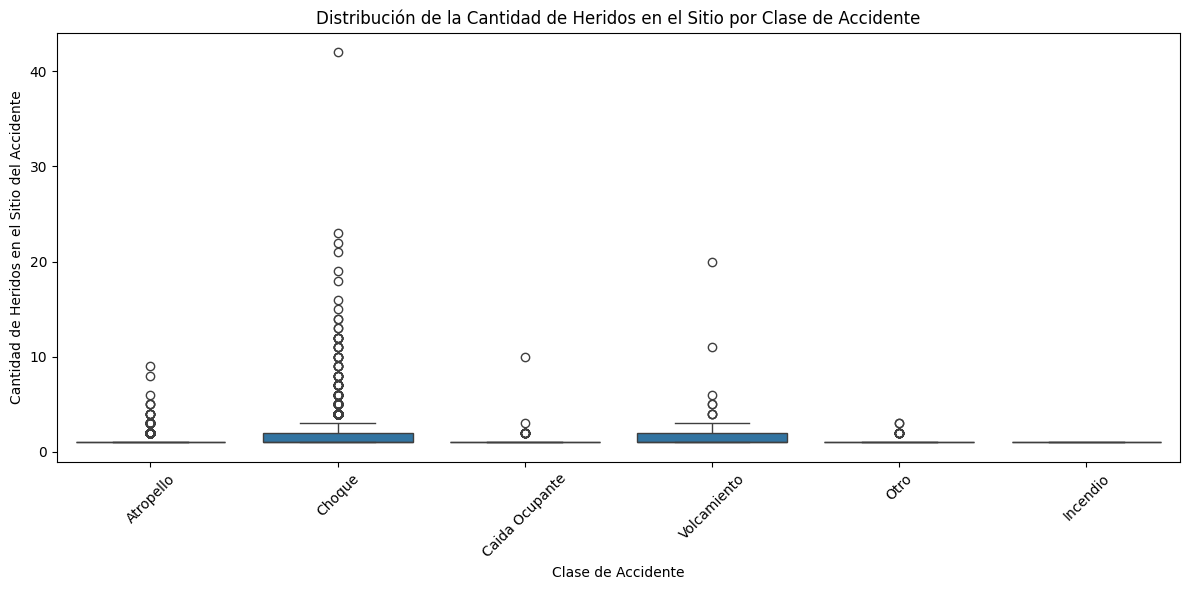

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=be5, x='CLASE_ACCIDENTE', y='CANT_HERIDOS_EN _SITIO_ACCIDENTE')

plt.title('Distribución de la Cantidad de Heridos en el Sitio por Clase de Accidente')
plt.xlabel('Clase de Accidente')
plt.ylabel('Cantidad de Heridos en el Sitio del Accidente')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Aquí vemos por primera vez los atípicos, como se puede ver son muchísimos. Ya se había observado que la variable de la cantidad de heridos tenía un rango bastante amplio, desde, ahora por la imputación realizada, 0 hasta 42.

In [174]:
q1 = be5['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].quantile(0.25)
q3 = be5['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = be5[(be5['CANT_HERIDOS_EN _SITIO_ACCIDENTE'] < lower_bound) | (be5['CANT_HERIDOS_EN _SITIO_ACCIDENTE'] > upper_bound)]

outliers[['CLASE_ACCIDENTE', 'GRAVEDAD_ACCIDENTE', 'CANT_HERIDOS_EN _SITIO_ACCIDENTE']]

,CLASE_ACCIDENTE,GRAVEDAD_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE
75,Choque,Con heridos,5.0
117,Choque,Con heridos,7.0
171,Choque,Con heridos,8.0
245,Choque,Con heridos,4.0
258,Choque,Con heridos,4.0
...,...,...,...
25373,Choque,Con heridos,4.0
25446,Choque,Con heridos,4.0
25466,Choque,Con heridos,4.0
25505,Choque,Con heridos,4.0


Al tomar los datos atípicos, se observa la existencia de 303 datos atípicos en la variable `CANT_HERIDOS_EN._SITIO_ACCIDENTE`, tomando como atípicos los registros con más de 4 heridos en el accidente. Al realizar la misma observación en `CANT_MUERTOS_EN._SITIO_ACCIDENTE` se obtiene lo siguiente:

In [175]:
q1 = be5['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].quantile(0.25)
q3 = be5['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = be5[(be5['CANT_MUERTOS_EN _SITIO_ACCIDENTE'] < lower_bound) | (be5['CANT_MUERTOS_EN _SITIO_ACCIDENTE'] > upper_bound)]

outliers[['CLASE_ACCIDENTE', 'GRAVEDAD_ACCIDENTE', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE']]

,CLASE_ACCIDENTE,GRAVEDAD_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE
1294,Atropello,Con muertos,2.0
3500,Choque,Con muertos,2.0
7087,Choque,Con muertos,2.0
11469,Choque,Con muertos,2.0
18069,Atropello,Con muertos,2.0
20073,Choque,Con muertos,2.0
20360,Choque,Con muertos,2.0
25049,Choque,Con muertos,2.0
25341,Choque,Con muertos,2.0


Aquí se puede observar que tomó como atípicos todos aquellos accidentes donde hubo más de un fallecido.

## Desarrollo segunda parte

### Sobre los datos
La base de datos analizada proviene del Sistema de Información de la Cadena de Distribución de Combustibles (SICOM), un sistema gestionado por el Ministerio de Minas y Energía. Este sistema integra a los diferentes agentes en la cadena de distribución de combustibles a nivel nacional, facilitando la gestión y sistematización de datos relacionados con la comercialización, distribución, transporte y almacenamiento de combustibles.

In [176]:
t32023 = pd.read_csv("precios_t32023.csv")
t42023 = pd.read_csv("precios_t42023.csv")
t12023 = pd.read_csv("precios_t12023.csv")
t22023 = pd.read_csv("precios_t22023.csv")

d2023 = pd.concat([t32023, t42023, t12023, t22023], ignore_index=True)
d2023.head()

,BANDERA,NOMBRE COMERCIAL,PRODUCTO,FECHA REGISTRO,DEPARTAMENTO,MUNICIPIO,VALOR PRECIO
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jul-2023,AMAZONAS,LA PEDRERA,20000.0
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jul-2023,AMAZONAS,LA PEDRERA,20000.0
2,TERPEL,ESTACION DE SERVICIO FLUVIAL BALSA JUNIN,GASOLINA MOTOR,01-Jul-2023,AMAZONAS,LETICIA,11800.0
3,TERPEL,ESTACION DE SERVICIO FLUVIAL BALSA JUNIN,DIESEL,01-Jul-2023,AMAZONAS,LETICIA,14809.0
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA EL PORVENIR,GASOLINA MOTOR,01-Jul-2023,AMAZONAS,LETICIA,16164.0



Debido a la gran cantidad de datos, se limitó a trabajar con el dataframe del 2023.

La base de datos incluye un total de 267,943 registros, cada uno representando registros diarios relacionados a la venta combustibles. Las variables incluyen información sobre el producto, su precio, y su ubicación y fecha de registro.

Esta consta de 9 variables, 8 categóricas y 1 numérica. La variable numérica corresponde a *`VALOR.PRECIO`*, una variable que contiene el precio del galón de gasolina el día de ese registro.

In [177]:
d2023['VALOR PRECIO'].describe(include='all')

count    2.679430e+05
mean     1.202313e+04
std      2.870979e+04
min      0.000000e+00
25%      9.350000e+03
50%      1.088000e+04
75%      1.384900e+04
max      1.475015e+07
Name: VALOR PRECIO, dtype: float64

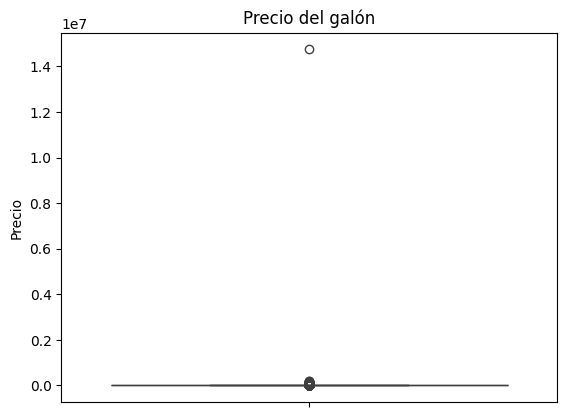

In [178]:
sns.boxplot(y=d2023['VALOR PRECIO'])
plt.title('Precio del galón')
plt.ylabel('Precio')
plt.xlabel('')
plt.show()

Se destaca la presencia de muchos atípicos, con valor extremadamente altos como 14750147, el cual no tiene sentido para el precio de un galón de gasolina. Más adelante, se verán más a detalle estos valores.

En cuanto a las variables categóricas restantes, tenemos ``BANDERA` que hace referencia a la compañía que tiene la sede especificada en el registro. Esta está liderada por Terpel (35,39%), Primax (13,47%), Biomax (12,02%), Texaco (10,11%) y Petromil (6,43%).

In [179]:
(d2023['BANDERA'].value_counts(normalize=True) * 100).sort_values(ascending=False)

BANDERA
TERPEL                 35.389243
PRIMAX                 13.477493
BIOMAX                 12.026812
TEXACO                 10.111106
PETROMIL                6.437563
COOMULPINORT            3.328320
AYATAWACOOP             3.006983
ZEUSS                   2.794624
PETROBRAS               1.817924
DISCOWACOOP             1.453667
ECOS                    1.348421
ESSO                    1.306994
PETRDECOL               1.304382
PETRODECOL              1.245414
PUMA                    1.141661
DISCOM                  1.088664
OCTANO                  0.828908
PLUS MAS                0.674024
P Y B                   0.628492
BRIO                    0.268341
ZAPATA Y VELASQUEZ      0.152271
SAVE                    0.106366
PROXXON                 0.062327
Name: proportion, dtype: float64

También se puede encontrar a la variable `*NOMBRE.COMERCIAL*` que indica el nombre de la estación de gasolina del registro. Esta cuenta con información sobre 5950 establecimientos en 911 municipios, guardados en la variable `*MUNICIPIOS*` de 32 departamentos, además de Bogotá D.C. como un departamento más representados en la variable ``*DEPARTAMENTO*` 

In [180]:
print("Número de empresas", d2023['NOMBRE COMERCIAL'].nunique())
print("Número de municipios", d2023['MUNICIPIO'].nunique())
print("Número de departamentos:", d2023['DEPARTAMENTO'].nunique())

Número de empresas 5950
Número de municipios 911
Número de departamentos: 33


In [181]:
(d2023['DEPARTAMENTO'].value_counts(normalize=True) * 100).sort_values(ascending=False)


DEPARTAMENTO
NARIÑO                                                      11.589778
ANTIOQUIA                                                    9.333702
NORTE DE SANTANDER                                           8.118145
VALLE DEL CAUCA                                              6.999250
CUNDINAMARCA                                                 6.206917
BOGOTA D.C.                                                  5.982989
CESAR                                                        5.860575
LA GUAJIRA                                                   5.089142
SANTANDER                                                    3.824321
ATLANTICO                                                    3.207772
TOLIMA                                                       2.990935
BOYACA                                                       2.899497
CORDOBA                                                      2.776710
BOLIVAR                                                      2.622573
PUTUMAY

Los departamentos con mayor número de registros son Nariño (11,58%), Antioquia con un 9,3% seguido de Norte de Santander (8,11%). Departamentos como Vaupés, Guianía y Archipielago de San Andrés y Providencia representan menos del 0.1% cada uno.

In [182]:
d2023['FECHA REGISTRO'] = pd.to_datetime(d2023['FECHA REGISTRO'], format='%d-%b-%Y')
d2023['MES'] = d2023['FECHA REGISTRO'].dt.month_name()

d2023['MES'].value_counts().sort_values(ascending=False)

MES
June         26887
November     25872
May          25590
January      22369
February     22206
March        22125
August       21959
September    21927
April        21635
October      19487
December     19433
July         18453
Name: count, dtype: int64

El número de registros por mes no se mantuvo constante, siendo junio el mes con más registros (26887) y julio (18453) el mes con menos registros, más adelante veremos mejor el comportamiento de los datos según el mes.




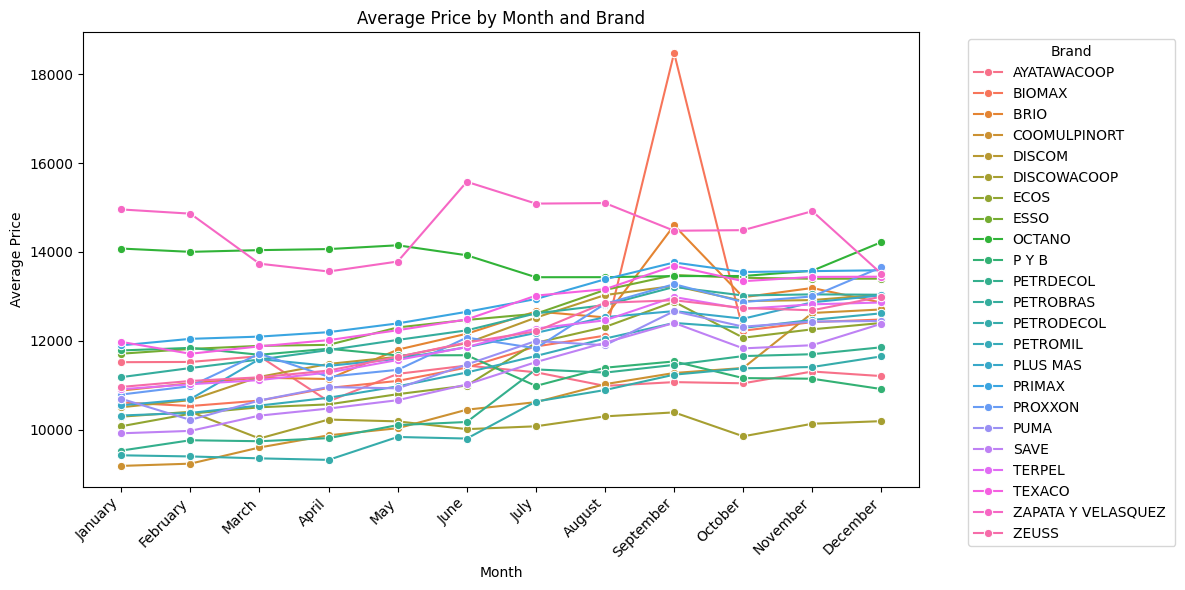

In [183]:
mo = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d2023['MES'] = pd.Categorical(d2023['MES'], categories=mo, ordered=True)

resumen_precios = d2023.groupby(['BANDERA', 'MES'])['VALOR PRECIO'].mean().reset_index()
resumen_precios.rename(columns={'VALOR PRECIO': 'PROMEDIO_PRECIO'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=resumen_precios, x='MES', y='PROMEDIO_PRECIO', hue='BANDERA', marker='o')
plt.title('Average Price by Month and Brand')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Según un artículo publicado en septiembre del 2022 en portafolio.co, en Colombia, más del 90 % de la torta en la distribución de combustibles en el territorio nacional sigue concentrada en cinco grandes compañías: Terpel (42,6%), Primax (20,2%), Biomax (8,7%), Chevron (Texaco 10,7%) y Petromil (4,4%). Enfoquémonos en las principales 5 empresas.

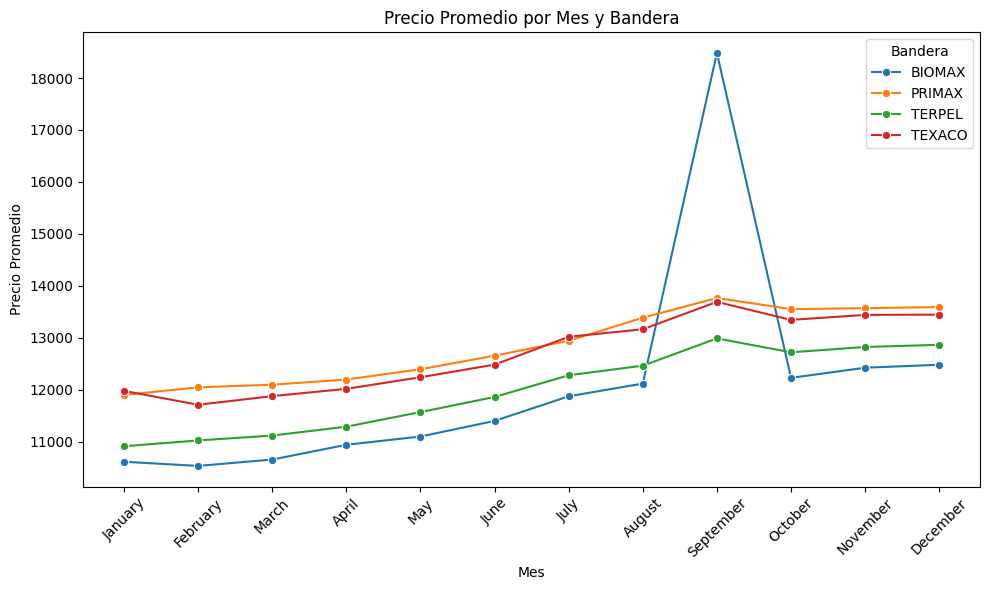

In [184]:
df = d2023[d2023['BANDERA'].isin(['TERPEL', 'PRIMAX', 'BIOMAX', 'TEXACO', 'PETROMIL'])]
gd = df.groupby(['BANDERA', 'MES'])['VALOR PRECIO'].mean().reset_index()
resumen_precios = gd.rename(columns={'VALOR PRECIO': 'PROMEDIO_PRECIO'})

plt.figure(figsize=(10, 6))
sns.lineplot(data=resumen_precios, x='MES', y='PROMEDIO_PRECIO', hue='BANDERA', marker='o')
plt.title('Precio Promedio por Mes y Bandera')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.legend(title='Bandera')
plt.tight_layout()
plt.show()


Se puede notar como en el transcurso del año, se mantiene un precio promedio similar en todas las compañías gasolineras, sin embargo en septiembre hubo un disparo en el precio de BIOMAX en comparación a las demás empresas. También se puede notar que en general PRIMAX maneja un precio más alto, seguido de TEXACO, luego TERPEL y por último BIOMAX.

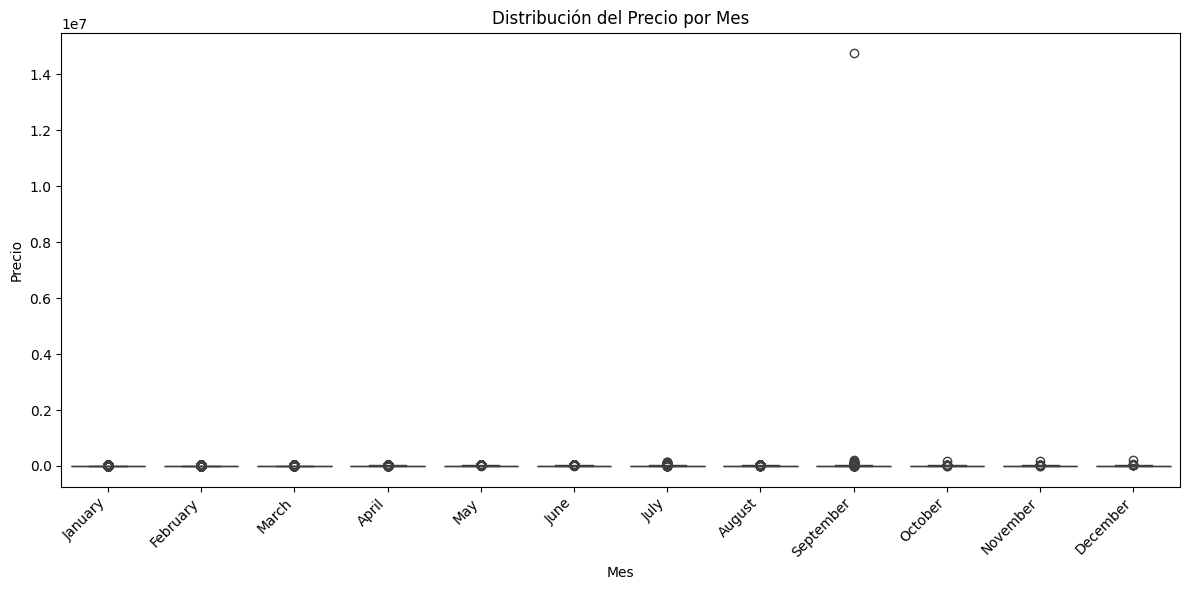

In [185]:
d2023_mensual = d2023.groupby('MES')['VALOR PRECIO'].mean().reset_index()
d2023_mensual.rename(columns={'VALOR PRECIO': 'PRECIO_PROMEDIO'}, inplace=True)

plt.figure(figsize=(12, 6))

sns.boxplot(data=d2023, x='MES', y='VALOR PRECIO')
plt.title('Distribución del Precio por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Se pueden observar muchísimos datos atípicos, pero el que más llama la atención es el que se encuentra en septiembre, el que se vio cuando se analizaron las variables individualmente como un valor muy exagerado. Veamos entonces todos los posibles valores atípicos que tiene nuestra base de datos.

### Datos atípicos

In [186]:
lb = d2023['VALOR PRECIO'].quantile(0.025)
up = d2023['VALOR PRECIO'].quantile(0.975)

outlier_mask = (d2023['VALOR PRECIO'] < lb) | (d2023['VALOR PRECIO'] > up)


mediana = d2023['VALOR PRECIO'].median()
d2023.loc[outlier_mask, 'VALOR PRECIO'] = mediana

d2023.describe()

,FECHA REGISTRO,VALOR PRECIO
count,267943,267943.000000
mean,2023-06-20 11:57:57.627704320,11805.762420
min,2023-01-01 00:00:00,7550.000000
25%,2023-04-01 00:00:00,9410.000000
50%,2023-06-07 00:00:00,10880.000000
75%,2023-09-22 00:00:00,13589.000000
max,2023-12-31 00:00:00,20120.000000
std,NaN,3117.397179


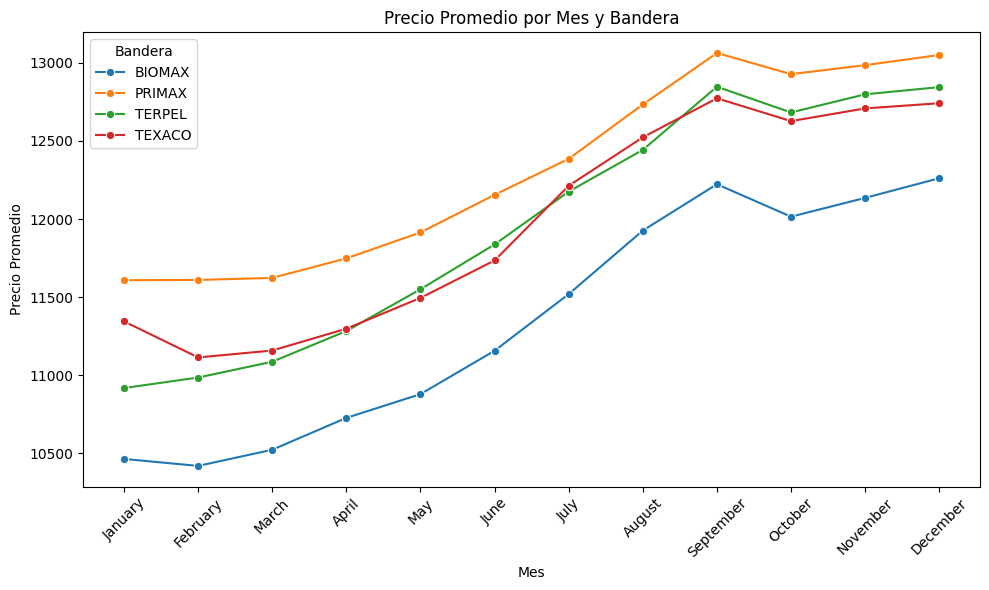

In [187]:
df = d2023[d2023['BANDERA'].isin(['TERPEL', 'PRIMAX', 'BIOMAX', 'TEXACO', 'PETROMIL'])]
gd = df.groupby(['BANDERA', 'MES'])['VALOR PRECIO'].mean().reset_index()
resumen_precios = gd.rename(columns={'VALOR PRECIO': 'PROMEDIO_PRECIO'})

plt.figure(figsize=(10, 6))
sns.lineplot(data=resumen_precios, x='MES', y='PROMEDIO_PRECIO', hue='BANDERA', marker='o')
plt.title('Precio Promedio por Mes y Bandera')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.legend(title='Bandera')
plt.tight_layout()
plt.show()

En comparación a la gráfica realizada anteriormente con la base de datos sin imputar, podemos notar la gran diferencia con el pico que se apreciaba en el mes de septiembre puesto que ahí estaba el outlier más alejado por mucho.

Veamos ahora la distribución del precio promedio a nivel departamental.Por motivos estéticos se realizó con ggplot para evitar afectaciones en el formato del quarto. Se dejan los códigos correspondientes al mapa con leaflet. 

### Mapa

In [216]:
mapa_col = gpd.read_file("COLOMBIA.shp")

mapa_col.head()

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.4044 8.85625,..."
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049..."
2,3,11,0,BOGOTA D.C.,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505..."
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,2.666559e+10,3,2005,4,15.706980,2.191055,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ..."
4,5,15,1886,BOYACA,Constitucion Politica de 1886,2.307705e+10,3,2005,5,15.280968,1.883315,"POLYGON ((-72.01129 7.00944, -72.01029 7.00912..."


In [217]:
mapa_col['DPTO_CNMBR'] = mapa_col['DPTO_CNMBR'].str.replace('?', 'Ñ')
mapa_col['DPTO_CNMBR'] = mapa_col['DPTO_CNMBR'].str.replace('ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y PROVIDENCIA', 'ARCHIPIELAGO DE SAN ANDRES')

mapa_col = mapa_col.rename(columns={'DPTO_CNMBR': 'DEPARTAMENTO'})

mapa_col.head(5)

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DEPARTAMENTO,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.4044 8.85625,..."
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049..."
2,3,11,0,BOGOTA D.C.,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505..."
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,2.666559e+10,3,2005,4,15.706980,2.191055,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ..."
4,5,15,1886,BOYACA,Constitucion Politica de 1886,2.307705e+10,3,2005,5,15.280968,1.883315,"POLYGON ((-72.01129 7.00944, -72.01029 7.00912..."


In [218]:
precios_promedio = d2023.groupby('DEPARTAMENTO')['VALOR PRECIO'].mean().reset_index()
precios_promedio = precios_promedio.rename(columns={'VALOR PRECIO': 'PROMEDIO_PRECIO'})
datos_unidos = mapa_col.merge(precios_promedio, on='DEPARTAMENTO', how='left')

In [219]:
datos_unidos.head()

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DEPARTAMENTO,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry,PROMEDIO_PRECIO
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.4044 8.85625,...",12361.954017
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049...",12403.867016
2,3,11,0,BOGOTA D.C.,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505...",12104.146840
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,2.666559e+10,3,2005,4,15.706980,2.191055,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ...",12044.842180
4,5,15,1886,BOYACA,Constitucion Politica de 1886,2.307705e+10,3,2005,5,15.280968,1.883315,"POLYGON ((-72.01129 7.00944, -72.01029 7.00912...",11910.608444


In [231]:
m = folium.Map(location=[4.5709, -74.2973], zoom_start=7, tiles='CartoDB positron')

folium.Choropleth(
    geo_data=datos_unidos,
    name='choropleth',
    data=datos_unidos,
    columns=['DEPARTAMENTO', 'PROMEDIO_PRECIO'],
    key_on='feature.properties.DEPARTAMENTO',
    fill_color='Spectral',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precio Promedio',
    highlight=True,
).add_to(m)

for _, row in datos_unidos.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=None,
        popup=f"{row['DEPARTAMENTO']}: {row['PROMEDIO_PRECIO']:.2f}",
    ).add_to(m)


folium.LayerControl().add_to(m)

mapa_html = 'mapa_interactivo.html'
m.save(mapa_html)

enlace_descarga = FileLink(mapa_html, result_html_prefix="Ver mapa")
display(enlace_descarga)